In [1]:
import ROOT
import uproot

import numpy as np
import scipy as sp
import pandas as pd
import awkward as ak

import matplotlib.pyplot as plt

Welcome to JupyROOT 6.24/06


## Some libraries/help

In [22]:
help(uproot)

Help on package uproot:

NAME
    uproot - Uproot: ROOT I/O in pure Python and NumPy.

DESCRIPTION
    Nearly all of the functions needed for general use are imported here, but the
    documentation gives fully qualified names. For example, the most frequently
    used function in Uproot is
    
    .. code-block:: python
    
        uproot.open("path/to/filename.root")
    
    but we refer to it in the documentation as :doc:`uproot.reading.open`.
    
    Typical entry points for file-reading are
    
    * :doc:`uproot.reading.open`
    * :doc:`uproot.behaviors.TBranch.iterate`
    * :doc:`uproot.behaviors.TBranch.concatenate`
    * :doc:`uproot.behaviors.TBranch.lazy`
    
    though they would usually be accessed as ``uproot.iterate``,
    ``uproot.concatenate``, and ``uproot.lazy``.
    
    The most useful classes are
    
    * :doc:`uproot.behaviors.TBranch.HasBranches` (``TTree`` or ``TBranch``)
    * :doc:`uproot.behaviors.TBranch.TBranch`
    * :doc:`uproot.behaviors.TH1`


In [23]:
help(ROOT)
help(ROOT.TTree)

Help on module ROOT:

NAME
    ROOT - # Author: Enric Tejedor, Danilo Piparo CERN  06/2018

FUNCTIONS
    AsCObject = as_cobject(...)
        Retrieve address of proxied object or field in a CObject.
    
    BindObject = bind_object(...)
        Create an object of given type, from given address.
    
    SetMemoryPolicy(...)
        Determines object ownership model.
    
    SetOwnership(...)
        Modify held C++ object ownership.
    
    addressof(...)
        Retrieve address of proxied object or field as a value.
    
    as_cobject(...)
        Retrieve address of proxied object or field in a CObject.
    
    bind_object(...)
        Create an object of given type, from given address.

DATA
    MakeNullPointer = functools.partial(<built-in function bind_object>, 0...
    PyConfig = <ROOT._facade.PyROOTConfiguration object>
    app = <ROOT._application.PyROOTApplication object>
    gROOT = <cppyy.gbl.TROOT object>
    kMemoryHeuristics = 64
    kMemoryStrict = 128
    nullpt

In [2]:
fileName = "samples/07-09-2021_58MB_Pt120_tune14_10k_SD/JetToyHIResultSoftDrop.root"
#fileName = "/data/alice/wesselr/01-09-2021_1.2GB_Pt120_tune14_100k_SD_and_Practice/JetToyHIResultSoftDrop.root"
#fileName = "~/Library/JetToyHI/JetToyHIResultSoftDrop.root"

In [3]:
# different file locations for different systems
inFile = ROOT.TFile(fileName, "READ")
inFile.ls()

TFile**		samples/07-09-2021_58MB_Pt120_tune14_10k_SD/JetToyHIResultSoftDrop.root	
 TFile*		samples/07-09-2021_58MB_Pt120_tune14_10k_SD/JetToyHIResultSoftDrop.root	
  KEY: TTree	jetTreeSig;1	JetToyHI tree


In [26]:
tree = inFile.Get("jetTreeSig")
tree.Print()

******************************************************************************
*Tree    :jetTreeSig: JetToyHI tree                                          *
*Entries :     5000 : Total =        25530448 bytes  File  Size =   21234873 *
*        :          : Tree compression factor =   1.20                       *
******************************************************************************
*Br    0 :eventWeight : vector<double>                                       *
*Entries :     5000 : Total  Size=     151065 bytes  File Size  =      10437 *
*Baskets :        6 : Basket Size=      32000 bytes  Compression=  14.42     *
*............................................................................*
*Br    1 :sigJetPt  : vector<double>                                         *
*Entries :     5000 : Total  Size=     242542 bytes  File Size  =     190274 *
*Baskets :        9 : Basket Size=      32000 bytes  Compression=   1.27     *
*...................................................

In [27]:
pt = tree.GetBranch("sigJetPt")
eta = tree.GetBranch("sigJetEta")
m = tree.GetBranch("sigJetM")

#pt_hist = ROOT.TH1D("data","m_{ll}, data" ,150,50.e3 ,200.e3)
#pt_hist.Sumw2()

In [29]:
pt.GetEntries()

5000

In [38]:
help(pt) #data, columns = tree.AsMatrix(columns=["sigJetRecur_nSD"], dtype="vector<double>")

Help on TBranchElement in module __main__ object:

class TBranchElement(TBranch)
 |  Method resolution order:
 |      TBranchElement
 |      TBranch
 |      TNamed
 |      TObject
 |      TAttFill
 |      CPPInstance
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  Browse(...)
 |      void TBranchElement::Browse(TBrowser* b)
 |  
 |  Class(...)
 |      static TClass* TBranchElement::Class()
 |  
 |  Class_Name(...)
 |      static const char* TBranchElement::Class_Name()
 |  
 |  Class_Version(...)
 |      static short TBranchElement::Class_Version()
 |  
 |  DeclFileLine(...)
 |      static int TBranchElement::DeclFileLine()
 |  
 |  DeclFileName(...)
 |      static const char* TBranchElement::DeclFileName()
 |  
 |  Dictionary(...)
 |      static TClass* TBranchElement::Dictionary()
 |  
 |  FindBranch(...)
 |      TBranch* TBranchElement::FindBranch(const char* name)
 |  
 |  FindLeaf(...)
 |      TLeaf* TBranchElement::FindLeaf(const char* name)
 |  
 |  GetAddress(..

In [34]:
pt.PrintValue(0)

 sigJetPt        = (vector<double>*)0x7ff6d4934920


In [64]:
for entry in range(0, tree.GetEntries()):
    print(pt.GetEntry(entry))

AttributeError: 'Model_TTree_v20' object has no attribute 'GetEntries'

In [40]:
help(ROOT.TTree)

Help on class TTree in module ROOT:

class TTree(TNamed, TAttLine, TAttFill, TAttMarker)
 |  PyROOT object proxy (internal)
 |  
 |  Method resolution order:
 |      TTree
 |      TNamed
 |      TObject
 |      TAttLine
 |      TAttFill
 |      TAttMarker
 |      ObjectProxy
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  AddAllocationCount = <ROOT.MethodProxy object>
 |  AddBranchToCache = <ROOT.MethodProxy object>
 |  AddClone = <ROOT.MethodProxy object>
 |  AddFriend = <ROOT.MethodProxy object>
 |  AddTotBytes = <ROOT.MethodProxy object>
 |  AddZipBytes = <ROOT.MethodProxy object>
 |  AsMatrix = _TTreeAsMatrix(self, columns=None, exclude=None, dtype='double', return_labels=False)
 |      Read-out the TTree as a numpy array.
 |      
 |      Note that the reading is performed in multiple threads if the implicit
 |      multi-threading of ROOT is enabled.
 |      
 |      Parameters:
 |          columns: If None return all branches as columns, otherwise specify names i

# Use uproot to access the data from the .root file

In [11]:
file = uproot.open(fileName)
tree = file['jetTreeSig']
branches = tree.arrays()

print(type(tree),
     file.keys(),
     tree.keys(),
     type(tree.arrays()), 
     sep="\n")

<class 'uproot.models.TTree.Model_TTree_v20'>
['jetTreeSig;1']
['eventWeight', 'sigJetPt', 'sigJetEta', 'sigJetPhi', 'sigJetM', 'sigJetArea', 'sigJetRecurKT_nSD', 'sigJetRecurKT_zSD', 'sigJetRecur_nSD', 'sigJetRecur_zSD', 'sigJetRecurKT_dr12', 'sigJetRecurKT_erad', 'sigJetRecurKT_jetpt', 'sigJetRecurKT_logdr12', 'sigJetRecurKT_logztheta', 'sigJetRecurKT_tf', 'sigJetRecurKT_z', 'sigJetRecur_dr12', 'sigJetRecur_erad', 'sigJetRecur_jetpt', 'sigJetRecur_logdr12', 'sigJetRecur_logztheta', 'sigJetRecur_tf', 'sigJetRecur_z', 'sigJetSDZ01B00Pt', 'sigJetSDZ01B00Eta', 'sigJetSDZ01B00Phi', 'sigJetSDZ01B00M', 'sigJetSDZ01B00Area', 'sigJetSDZ01B00dr12', 'sigJetSDZ01B00leadingtrack_pt', 'sigJetSDZ01B00logdr12', 'sigJetSDZ01B00logztheta', 'sigJetSDZ01B00mass', 'sigJetSDZ01B00zg', 'sigJetSDZ01B00ndrop', 'sigJetSDZ01B00KTPt', 'sigJetSDZ01B00KTEta', 'sigJetSDZ01B00KTPhi', 'sigJetSDZ01B00KTM', 'sigJetSDZ01B00KTArea', 'sigJetSDZ01B00KTdr12', 'sigJetSDZ01B00KTleadingtrack_pt', 'sigJetSDZ01B00KTlogdr12', 's

In [59]:
branches = tree.arrays() # Awkward Array structure
print(branches['sigJetRecurKT_jetpt'],
      type(branches['sigJetRecurKT_jetpt']),
      sep="\n")

pts = branches['sigJetRecurKT_jetpt'] # Awakward Array structure

[[[166, 89.8, 82.9], [119, 105, 90.8, ... 68.7, 59.5, 41.8, 37, 29.5, 22.8, 17.2]]]
<class 'awkward.highlevel.Array'>


In [79]:
tester = pts[0][0]
print(tester,
     type(tester),
     sep="\n")

# print out the pts of all jets of first 10 events
for i in range(10):
    for j in range(len(pts[i])):
        print(pts[i][j])

[166, 89.8, 82.9]
<class 'awkward.highlevel.Array'>
[166, 89.8, 82.9]
[119, 105, 90.8, 47.5]
[15.5, 8.19, 4.99]
[128, 84.3, 65.2, 33.5, 24.9]
[103, 58.3, 42.9, 36.6]
[48.1, 45.7, 42.2, 38.6]
[15.6, 11.8, 9.22, 4.7]
[127, 64.7, 33.8, 21.4]
[84.7, 60.5, 35.2, 29.5, 21.8]
[57.2, 40.2, 34.3, 26.3]
[134, 67.1, 48, 38.7, 30.1]
[69.3, 51.1, 33.2, 18.6, 13.4, 9.7]
[34.9, 27, 24.2, 20.2]
[31.6, 20, 18.4]
[18, 14.4, 10.1, 8.03]
[13.3, 10.2, 9.57, 9.23]
[148, 119, 72.5, 68.9]
[125, 86.5, 74.3, 56.7, 32.1, 25.3, 15.5]
[120, 94.8, 75.1, 56.8, 35.4, 34.1]
[52, 33.7, 27.1, 15.2]
[10.9, 7.95, 5.43, 3.23]
[52.1, 31.8, 19.5, 16.8, 11.3]
[37.4, 24.8, 19.1, 12.7]
[29.9, 19.6, 11.8, 6.47, 5.11]
[23.6, 13, 7.19]
[15.8, 8.79, 7.77]
[187, 170, 143, 95.1]
[163, 109, 97.9, 66.4, 64.7, 63.8, 51.8, 41.2, 31.7, 18.8]
[21, 13.2, 9.09]
[14.1, 8.86, 4.59, 3.63]
[131, 79.1, 51.3, 47.7, 27.9, 14]
[129, 81.4, 51.4, 48.5, 27.2]
[14.9, 11.1, 7.57, 4.99]
[123, 62.6, 47.3, 30.4, 20.6]
[117, 77.7, 62.8, 61.1, 55, 45.2, 44.3]

In [77]:
# flatten!
pts_flat = ak.flatten(ak.flatten(pts))
print(pts_flat, len(pts_flat), type(pts_flat), sep="\n")

[166, 89.8, 82.9, 119, 105, 90.8, 47.5, ... 68.7, 59.5, 41.8, 37, 29.5, 22.8, 17.2]
106300
<class 'awkward.highlevel.Array'>


In [101]:
ak.to_pandas(pts).head(10)

values
entry subentry subsubentry            
0     0        0            166.259094
               1             89.805169
               2             82.903860
      1        0            118.908968
               1            104.629033
               2             90.839172
               3             47.470975
      2        0             15.531611
               1              8.186946
               2              4.987687

In [102]:
ak.to_pandas(ak.flatten(pts)).head(10)

values
entry subentry            
0     0         166.259094
      1          89.805169
      2          82.903860
1     0         118.908968
      1         104.629033
      2          90.839172
      3          47.470975
2     0          15.531611
      1           8.186946
      2           4.987687

In [103]:
ak.to_pandas(pts_flat).head(10)

,values
entry,
0,166.259094
1,89.805169
2,82.903860
3,118.908968
4,104.629033
5,90.839172
6,47.470975
7,15.531611
8,8.186946


In [98]:
data_set = branches[['sigJetRecurKT_dr12','sigJetRecurKT_jetpt', 'sigJetRecurKT_z']]
df_recur = ak.to_pandas(data_set)
df_recur

sigJetRecurKT_dr12  sigJetRecurKT_jetpt  \
entry subentry subsubentry                                            
0     0        0                      0.054011           166.259094   
               1                      0.211723            89.805169   
               2                      0.044130            82.903860   
      1        0                      0.257657           118.908968   
               1                      0.250318           104.629033   
...                                        ...                  ...   
4999  1        3                      0.102816            41.789596   
               4                      0.036528            37.034504   
               5                      0.028475            29.460847   
               6                      0.029934            22.763547   
               7                      0.002251            17.227935   

                            sigJetRecurKT_z  
entry subentry subsubentry                   
0     0        0                   0.459968  
               1                   0.078255  
               2                   0.086521  
      1        0                   0.123228  
               1                   0.132401  
...                                     ...  
4999  1        3                   0.113789  
               4                   0.204544  
               5                   0.227381  
               6                   0.243189  
               7                   0.218236  

[106300 rows x 3 columns]

## Error in pt calculation?

In [99]:
# Why is this not correct? There is missing pt?
166.259094 * (1-0.459968)

89.78523105100801

In [108]:
 1 - (89.805169 / 166.259094)

0.4598480790470324

In [104]:
118.908968 * (1-0.123228)

104.256053691296

array([[<AxesSubplot:xlabel='sigJetRecurKT_dr12', ylabel='sigJetRecurKT_dr12'>,
        <AxesSubplot:xlabel='sigJetRecurKT_jetpt', ylabel='sigJetRecurKT_dr12'>,
        <AxesSubplot:xlabel='sigJetRecurKT_z', ylabel='sigJetRecurKT_dr12'>],
       [<AxesSubplot:xlabel='sigJetRecurKT_dr12', ylabel='sigJetRecurKT_jetpt'>,
        <AxesSubplot:xlabel='sigJetRecurKT_jetpt', ylabel='sigJetRecurKT_jetpt'>,
        <AxesSubplot:xlabel='sigJetRecurKT_z', ylabel='sigJetRecurKT_jetpt'>],
       [<AxesSubplot:xlabel='sigJetRecurKT_dr12', ylabel='sigJetRecurKT_z'>,
        <AxesSubplot:xlabel='sigJetRecurKT_jetpt', ylabel='sigJetRecurKT_z'>,
        <AxesSubplot:xlabel='sigJetRecurKT_z', ylabel='sigJetRecurKT_z'>]],
      dtype=object)

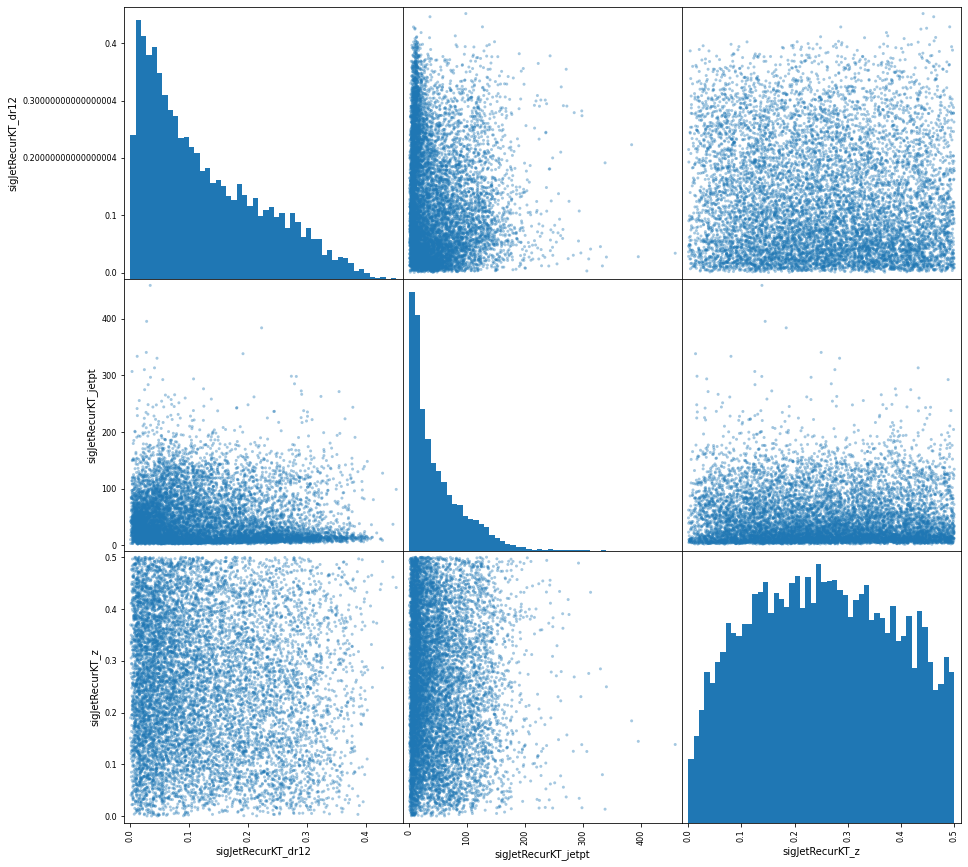

In [105]:
pd.plotting.scatter_matrix(df_recur.head(10**4),
                           alpha=0.4,
                           hist_kwds={'bins':50},
                           figsize=(15,15))

In [ ]:
data_set = branches[['sigJet_dr12','sigJet_jetpt', 'sigJet_z']]

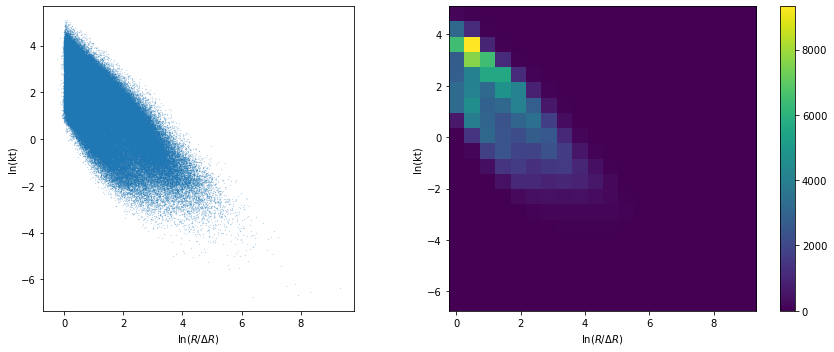

In [117]:
data_set = branches[['sigJetRecur_dr12',
                     'sigJetRecur_jetpt',
                     'sigJetRecur_z']]
df_recur = ak.to_pandas(data_set)
df_recur


"""
pd.plotting.scatter_matrix(df_recur.head(10**4),
                           alpha=0.4,
                           hist_kwds={'bins': 50},
                           figsize=(7, 7))
plt.show()
"""
flat_dr = ak.flatten(ak.flatten(data_set["sigJetRecur_dr12"]))
flat_pt = ak.flatten(ak.flatten(data_set["sigJetRecur_jetpt"]))
flat_z = ak.flatten(ak.flatten(data_set["sigJetRecur_z"]))
flat_kt = (1-flat_z) * flat_pt * flat_dr

fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize = (12, 5), gridspec_kw={'width_ratios': [1, 1.5]})
ax[0].plot(np.log(0.4/flat_dr),
         np.log(flat_kt),'o', alpha=0.5, markersize=0.2)
ax[0].set_xlabel(r'$\ln (R/\Delta R)$')
ax[0].set_ylabel('ln(kt)')
#plt.xlim(left=-0.5, right=5)
#plt.ylim(bottom=-2, top=5)

H, xedges, yedges = np.histogram2d(np.log(0.4/flat_dr),
         np.log(flat_kt), bins=20)
im = ax[1].imshow(H.T, interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect=0.8)
fig.colorbar(im, ax=ax[1])
ax[1].set_xlabel(r'$\ln (R/\Delta R)$')
ax[1].set_ylabel('ln(kt)')
plt.tight_layout()
plt.show()


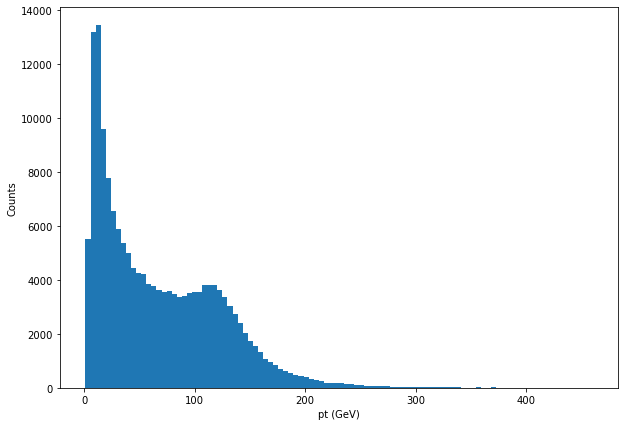

67.62425927261175


In [74]:
plt.figure(figsize=(10,7))
plt.hist(flat_pt, bins=100)
plt.xlabel("pt (GeV)")
plt.ylabel("Counts")
plt.show()


print(np.mean(flat_pt))

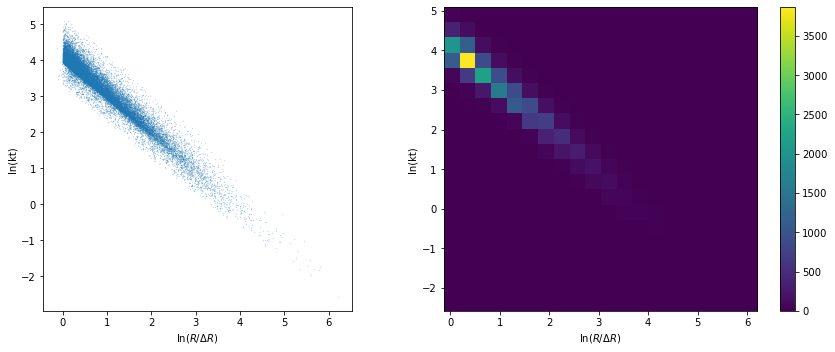

In [122]:
kts = []
rs = []

for i, pt in enumerate(flat_pt):
    if (pt > 130): #and (pt > 20):
        z = flat_z[i]
        dr12 = flat_dr[i]
        kts.append((1-z) * pt * dr12)
        rs.append(0.4 / dr12)

kts = np.array(kts)
rs = np.array(rs)

fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize = (12, 5), gridspec_kw={'width_ratios': [1, 1.5]})
fig.patch.set_facecolor('white')
ax[0].plot(np.log(rs),
         np.log(kts),'o', alpha=0.5, markersize=0.2)
ax[0].set_xlabel(r'$\ln (R/\Delta R)$')
ax[0].set_ylabel('ln(kt)')
#plt.xlim(left=-0.5, right=5)
#plt.ylim(bottom=-2, top=5)

H, xedges, yedges = np.histogram2d(np.log(rs),
         np.log(kts), bins=20)
im = ax[1].imshow(H.T, interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect=0.8)
fig.colorbar(im, ax=ax[1])
ax[1].set_xlabel(r'$\ln (R/\Delta R)$')
ax[1].set_ylabel('ln(kt)')
plt.tight_layout()
plt.show()


In [115]:
print(len(ak.flatten(branches['sigJetPt'])))
print(len(kts))
print(min(rs))

21405
23535
2.1934660228393983


## Now try with pandas, is it better?

In [19]:
df = ak.to_pandas(branches[['eventWeight','sigJetPt','sigJetRecur_zSD', 'sigJetRecur_jetpt', 'sigJetRecur_z']])

In [22]:
df

eventWeight    sigJetPt  sigJetRecur_zSD  \
entry subentry subsubentry                                             
0     0        0                    1.0  166.259094         0.672971   
               1                    1.0  166.259094         0.672971   
               2                    1.0  166.259094         0.672971   
               3                    1.0  166.259094         0.672971   
               4                    1.0  166.259094         0.672971   
...                                 ...         ...              ...   
4999  1        4                    1.0  120.145338         1.856481   
               5                    1.0  120.145338         1.856481   
               6                    1.0  120.145338         1.856481   
               7                    1.0  120.145338         1.856481   
               8                    1.0  120.145338         1.856481   

                            sigJetRecur_jetpt  sigJetRecur_z  
entry subentry subsubentry                                    
0     0        0                   166.259094       0.013718  
               1                   164.093824       0.004916  
               2                   163.287438       0.015329  
               3                   160.883889       0.029679  
               4                   156.167616       0.151144  
...                                       ...            ...  
4999  1        4                    54.711533       0.323383  
               5                    37.034504       0.204544  
               6                    29.460847       0.187902  
               7                    23.925744       0.279986  
               8                    17.227935       0.218236  

[98617 rows x 5 columns]

array([[<AxesSubplot:xlabel='sigJetPt', ylabel='sigJetPt'>,
        <AxesSubplot:xlabel='sigJetEta', ylabel='sigJetPt'>,
        <AxesSubplot:xlabel='sigJetM', ylabel='sigJetPt'>],
       [<AxesSubplot:xlabel='sigJetPt', ylabel='sigJetEta'>,
        <AxesSubplot:xlabel='sigJetEta', ylabel='sigJetEta'>,
        <AxesSubplot:xlabel='sigJetM', ylabel='sigJetEta'>],
       [<AxesSubplot:xlabel='sigJetPt', ylabel='sigJetM'>,
        <AxesSubplot:xlabel='sigJetEta', ylabel='sigJetM'>,
        <AxesSubplot:xlabel='sigJetM', ylabel='sigJetM'>]], dtype=object)

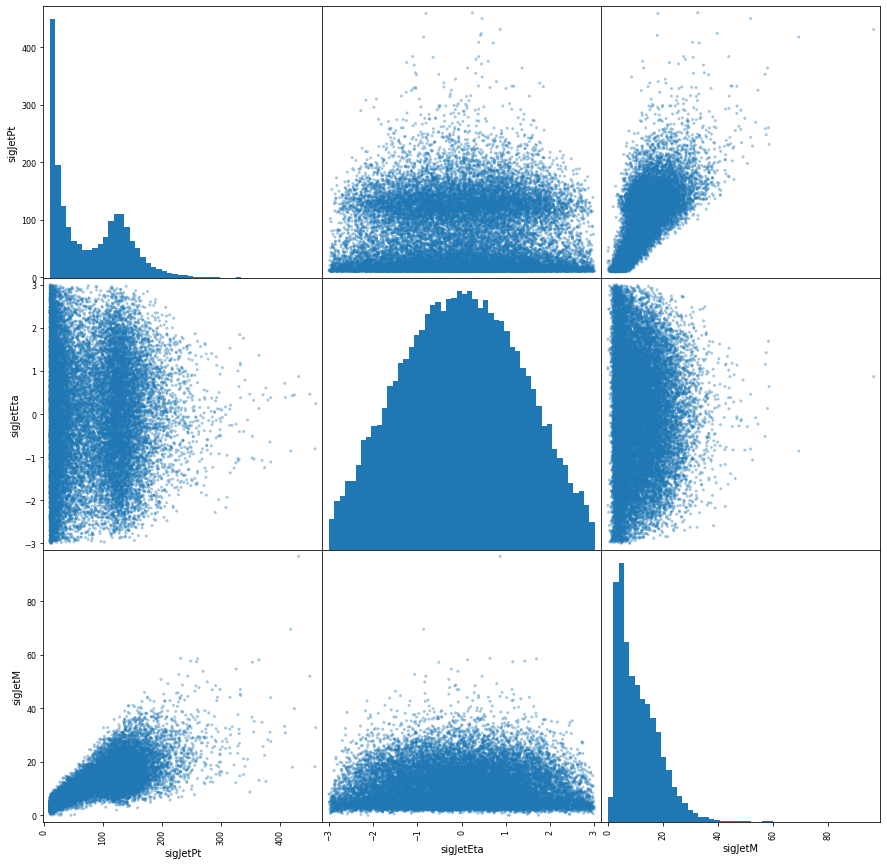

In [53]:
df1 = columns[["sigJetPt", "sigJetEta", "sigJetM"]]
pd.plotting.scatter_matrix(df1, alpha=0.4, hist_kwds={'bins':50}, figsize=(15,15))

In [54]:
print(df.head(),
columns.head())

                eventWeight  \
entry subentry                
0     0                 1.0   
      1                 1.0   
1     0                 1.0   
      1                 1.0   
2     0                 1.0   

                                               sigJetRecurKT_dr12  \
entry subentry                                                      
0     0         ((0.05401051253248253, 0.2117232049633555, 0.0...   
      1         ((0.05401051253248253, 0.2117232049633555, 0.0...   
1     0         ((0.18244280772383598, 0.12715347147201725, 0....   
      1         ((0.18244280772383598, 0.12715347147201725, 0....   
2     0         ((0.4285535905342619, 0.08148866094621668, 0.0...   

                                               sigJetRecurKT_erad  \
entry subentry                                                      
0     0         ((305.7553602166219, 167.10808180956826, 154.4...   
      1         ((305.7553602166219, 167.10808180956826, 154.4...   
1     0         ((1150

In [55]:
dr1 = df["sigJetRecurKT_dr12"]
dr2 = columns["sigJetRecurKT_dr12"]
print(dr1.shape, dr2.shape)
print(dr1[0],
      dr1[0].shape,
      dr2[0],
      dr2[0].shape,
      sep="\n")
print(dr1[0][0]==dr1[0][1])
print(dr2[0][0]==dr2[0][1])


(10000,) (21405,)
subentry
0    ((0.05401051253248253, 0.2117232049633555, 0.0...
1    ((0.05401051253248253, 0.2117232049633555, 0.0...
Name: sigJetRecurKT_dr12, dtype: object
(2,)
subentry
0    ((0.05401051253248253, 0.2117232049633555, 0.0...
1    ((0.05401051253248253, 0.2117232049633555, 0.0...
2    ((0.05401051253248253, 0.2117232049633555, 0.0...
Name: sigJetRecurKT_dr12, dtype: object
(3,)
True
True


In [56]:
df2 = columns[["sigJetRecurKT_dr12", "sigJetRecurKT_jetpt", "sigJetRecurKT_z"]]
df2.head()

sigJetRecurKT_dr12  \
entry subentry                                                      
0     0         ((0.05401051253248253, 0.2117232049633555, 0.0...   
      1         ((0.05401051253248253, 0.2117232049633555, 0.0...   
      2         ((0.05401051253248253, 0.2117232049633555, 0.0...   
1     0         ((0.18244280772383598, 0.12715347147201725, 0....   
      1         ((0.18244280772383598, 0.12715347147201725, 0....   

                                              sigJetRecurKT_jetpt  \
entry subentry                                                      
0     0         ((166.2590944288185, 89.80516939280774, 82.903...   
      1         ((166.2590944288185, 89.80516939280774, 82.903...   
      2         ((166.2590944288185, 89.80516939280774, 82.903...   
1     0         ((128.4237743586658, 84.25342732612414, 65.240...   
      1         ((128.4237743586658, 84.25342732612414, 65.240...   

                                                  sigJetRecurKT_z  
entry subentry                                                     
0     0         ((0.4599679553635745, 0.07825522775342324, 0.0...  
      1         ((0.4599679553635745, 0.07825522775342324, 0.0...  
      2         ((0.4599679553635745, 0.07825522775342324, 0.0...  
1     0         ((0.3460622636732602, 0.22573960291266726, 0.4...  
      1         ((0.3460622636732602, 0.22573960291266726, 0.4...

In [100]:
df2.head()

NameError: name 'df2' is not defined

In [57]:
pd.plotting.scatter_matrix(df2, alpha=0.4, hist_kwds={'bins':50}, figsize=(15,15))

ValueError: Number of columns must be a positive integer, not 0

<Figure size 1080x1080 with 0 Axes>

In [ ]:
pt = tree["sigJetPt"].array().flatten().reshape(-1, 1)
m = tree["sigJetM"].array(library="np").flatten().reshape(-1, 1)
eta = tree["sigJetEta"].array(library="np").flatten().reshape(-1, 1)
print(pt.shape, m.shape, eta.shape, np.concatenate((pt, m, eta), axis=1).shape)

## Implement Bas Hofman's solutions

In [17]:
events = uproot.open(fileName)['jetTreeSig']
variables = events.keys()
print(variables)

['eventWeight', 'sigJetPt', 'sigJetEta', 'sigJetPhi', 'sigJetM', 'sigJetArea', 'sigJetRecurKT_nSD', 'sigJetRecurKT_zSD', 'sigJetRecur_nSD', 'sigJetRecur_zSD', 'sigJetRecurKT_dr12', 'sigJetRecurKT_erad', 'sigJetRecurKT_jetpt', 'sigJetRecurKT_logdr12', 'sigJetRecurKT_logztheta', 'sigJetRecurKT_tf', 'sigJetRecurKT_z', 'sigJetRecur_dr12', 'sigJetRecur_erad', 'sigJetRecur_jetpt', 'sigJetRecur_logdr12', 'sigJetRecur_logztheta', 'sigJetRecur_tf', 'sigJetRecur_z', 'sigJetSDZ01B00Pt', 'sigJetSDZ01B00Eta', 'sigJetSDZ01B00Phi', 'sigJetSDZ01B00M', 'sigJetSDZ01B00Area', 'sigJetSDZ01B00dr12', 'sigJetSDZ01B00leadingtrack_pt', 'sigJetSDZ01B00logdr12', 'sigJetSDZ01B00logztheta', 'sigJetSDZ01B00mass', 'sigJetSDZ01B00zg', 'sigJetSDZ01B00ndrop', 'sigJetSDZ01B00KTPt', 'sigJetSDZ01B00KTEta', 'sigJetSDZ01B00KTPhi', 'sigJetSDZ01B00KTM', 'sigJetSDZ01B00KTArea', 'sigJetSDZ01B00KTdr12', 'sigJetSDZ01B00KTleadingtrack_pt', 'sigJetSDZ01B00KTlogdr12', 'sigJetSDZ01B00KTlogztheta', 'sigJetSDZ01B00KTmass', 'sigJetSDZ01

In [18]:
eigen = np.zeros((len(variables), len(variables), 2))
vector = np.zeros((len(variables), len(variables), 4))

def calculatePCA(var1, var2):
    matrix = events.arrays([variables[var1]]).flatten()
    matrix = np.vstack(matrix, event.array([variables[var2]]).flatten())
    matrix = matrix.T
    pca = PCA(n_components=2)
    pca.fit(matrix)
    return pca.explained_variance_,pca.components_,matrix

In [19]:
print(calculatePCA('sigJetPt', 'sigJetM'))

TypeError: list indices must be integers or slices, not str

In [20]:
matrix = events.arrays([variables[1]]).flatten()

AttributeError: no field named 'flatten'

(https://github.com/scikit-hep/awkward-1.0/blob/1.5.0/src/awkward/highlevel.py#L1130)